# Rep 2. Checkpoint 5. Actividades de aplicación GBM

Edgardo Gonzalez Tejeda

## Aplicación 1: Optimización bajo restricción de riesgo


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from scipy.stats import norm

Descarga de datos 

In [18]:
stocks = ["AAPL","MSFT","GOOGL","AMZN"]
end = dt.datetime.today()
start = end - dt.timedelta(days=365*3)

data = yf.download(stocks,start=start,end=end)["Close"]
returns = data.pct_change().dropna()

n_sim=10000
n_assets=len(stocks)
n_days=252

[*********************100%***********************]  4 of 4 completed


In [19]:
#1. Calcular históricas
mean_returns = returns.mean()
cov_matrix = returns.cov()

Simulación del portafolio

In [20]:
# 2. Generar las 30 combinaciones de pesos (si no las has guardado)
np.random.seed(42)
weights_matrix = np.random.random((30, n_assets))
weights_matrix = weights_matrix / weights_matrix.sum(axis=1)[:, np.newaxis]

In [21]:
# 3. Función de simulación adaptada de tu código para obtener Rendimiento y Riesgo
def simulate_portfolio_performance(weights, mean_returns, cov_matrix, n_days, n_sim):
    L = np.linalg.cholesky(cov_matrix)
    final_returns = np.zeros(n_sim)
    for i in range(n_sim):
        Z = np.random.normal(size=(n_days, len(weights)))
        daily_sim_returns = (Z @ L.T) + mean_returns.values
        port_daily = daily_sim_returns @ weights
        path = np.cumprod(1 + port_daily)
        final_returns[i] = path[-1] - 1
    return final_returns

In [22]:
# 4. Ejecutar la simulación para cada una de las 30 combinaciones
results = []
for i in range(30):
    w = weights_matrix[i]
    simulated_outcomes = simulate_portfolio_performance(w, mean_returns, cov_matrix, n_days, n_sim)
    exp_return = simulated_outcomes.mean()      # Rendimiento esperado
    risk_std = simulated_outcomes.std()        # Volatilidad simulada
    var_95 = np.percentile(simulated_outcomes, 5) # VaR al 95% (percentil 5)
    results.append({
        'Portafolio': i + 1,
        'Retorno_Esperado': exp_return,
        'Volatilidad': risk_std,
        'VaR_95': var_95,
        'Pesos': w
    })


In [23]:
best_index = filtered_df["mean"].idxmax()
# Convertir a DataFrame para análisis
df_results = pd.DataFrame(results)
df_results.head()

,Portafolio,Retorno_Esperado,Volatilidad,VaR_95,Pesos
0,1,0.371251,0.309809,-0.073889,"[0.1410215567872302, 0.3579622176722185, 0.275..."
1,2,0.250225,0.274359,-0.146210,"[0.12620080734580005, 0.12618129700478345, 0.0..."
2,3,0.272595,0.277582,-0.129619,"[0.26139050028350513, 0.3079002216404562, 0.00..."
3,4,0.314440,0.293390,-0.100961,"[0.5903801501374071, 0.15059391470113248, 0.12..."
4,5,0.369983,0.310890,-0.079690,"[0.1960105449641472, 0.33807860847040766, 0.27..."


In [24]:
df_filtrado = df_results[df_results['VaR_95'] >= -0.05]
df_filtrado

,Portafolio,Retorno_Esperado,Volatilidad,VaR_95,Pesos
7,8,0.393140,0.307291,-0.048246,"[0.418096105230573, 0.03278234139631074, 0.428..."
12,13,0.370023,0.293802,-0.044133,"[0.22077866667837767, 0.07464999609941027, 0.3..."
15,16,0.407006,0.313986,-0.047752,"[0.21060616432103235, 0.14703143273377783, 0.4..."
27,28,0.380177,0.298205,-0.047975,"[0.30234280665296986, 0.10172425090699433, 0.3..."


In [25]:
# 6. Identificar el portafolio con MAYOR rendimiento esperado
portafolio_maximo = df_results.loc[df_results['Retorno_Esperado'].idxmax()]
portafolio_maximo
portafolio_optimo = df_filtrado.loc[df_filtrado['Retorno_Esperado'].idxmax()]
portafolio_optimo, portafolio_maximo

(Portafolio                                                         16
 Retorno_Esperado                                             0.407006
 Volatilidad                                                  0.313986
 VaR_95                                                      -0.047752
 Pesos               [0.21060616432103235, 0.14703143273377783, 0.4...
 Name: 15, dtype: object,
 Portafolio                                                         18
 Retorno_Esperado                                             0.430464
 Volatilidad                                                  0.364796
 VaR_95                                                      -0.071974
 Pesos               [0.0366811237457329, 0.4855775893765176, 0.379...
 Name: 17, dtype: object)

C:\Users\dayan\AppData\Local\Temp\ipykernel_43612\799910220.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


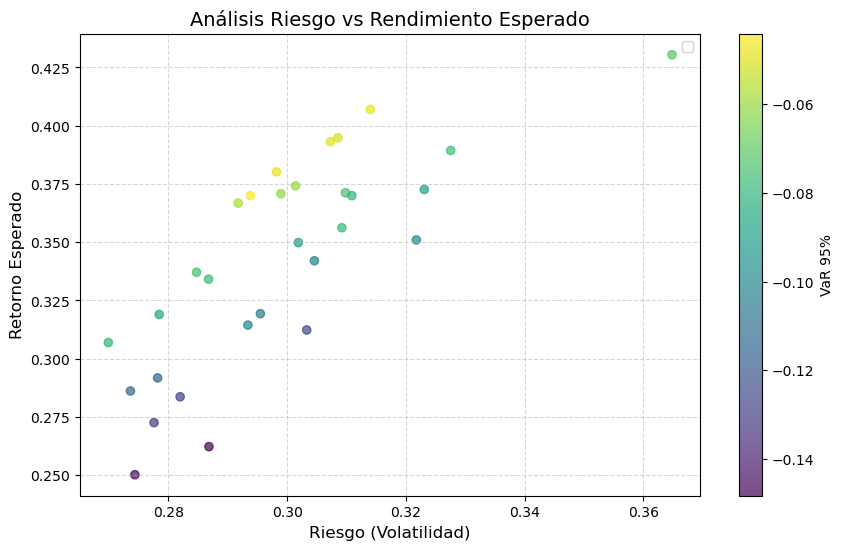

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_results['Volatilidad'], df_results['Retorno_Esperado'], c=df_results['VaR_95'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='VaR 95%')
plt.title('Análisis Riesgo vs Rendimiento Esperado', fontsize=14)
plt.xlabel('Riesgo (Volatilidad)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

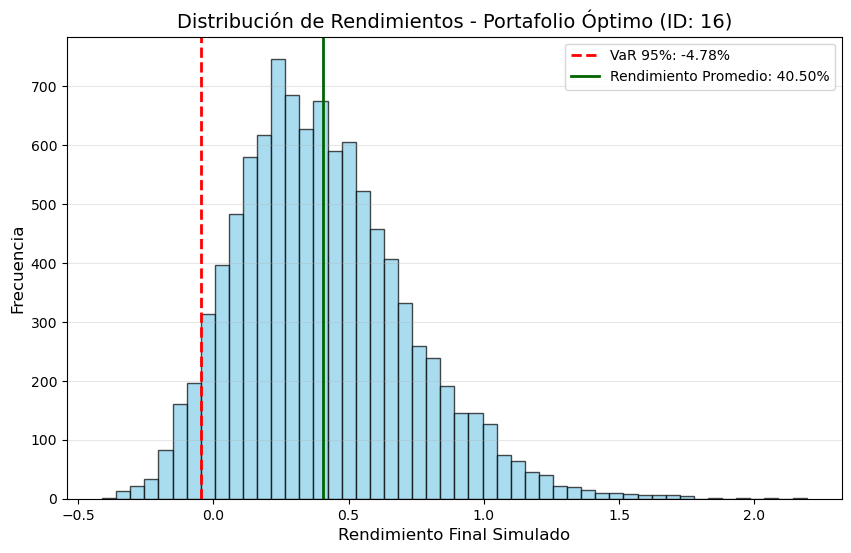

In [27]:
rendimientos_ganador = simulate_portfolio_performance(portafolio_optimo['Pesos'], mean_returns, cov_matrix, n_days, n_sim)

plt.figure(figsize=(10, 6))
plt.hist(rendimientos_ganador, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(portafolio_optimo['VaR_95'], color='red', linestyle='--', linewidth=2,label=f'VaR 95%: {portafolio_optimo["VaR_95"]:.2%}')
plt.axvline(rendimientos_ganador.mean(), color='darkgreen', linestyle='-', linewidth=2,label=f'Rendimiento Promedio: {rendimientos_ganador.mean():.2%}')
plt.title(f'Distribución de Rendimientos - Portafolio Óptimo (ID: {portafolio_optimo["Portafolio"]})', fontsize=14)
plt.xlabel('Rendimiento Final Simulado', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## **Preguntas:**

- **¿Cuántos portafolios cumplen la restricción?**

Sólo 3 

- **¿Cuánto rendimiento se sacrifica por controlar riesgo?**

El maximo que tuve fue con un rendimiento de 42.78% y el portafolio optimo con la restricción de riesgo tuvo un rendimiento de 38.93%, sacrificamos 3.85% de rendimiento esperado.

## Aplicación 2: Escenarios macroeconómicos

In [28]:
tickers = ["AAPL", "MSFT", "NVDA", "AMZN"]
weights = np.array([0.25, 0.25, 0.25, 0.25])

n_sim = 10000
horizon = 15
confidence = 0.95

scenarios = {
    "Base": 0,
    "Alcista": 0.001,
    "Bajista": -0.001
}

end = dt.datetime.today()
start = end - dt.timedelta(days=365*5)

prices = yf.download(tickers, start=start, end=end, progress=False)["Close"]

returns = prices.pct_change().dropna()

portfolio_returns = returns @ weights

mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

print("Media histórica:", mu)
print("Volatilidad histórica:", sigma)

Media histórica: 0.0011317848576002229
Volatilidad histórica: 0.01843754796677805


In [29]:

def simulate_paths(mu, sigma, shift, n_sim, horizon):

    mu_scenario = mu + shift

    simulations = np.zeros(n_sim)

    for i in range(n_sim):

        returns_sim = np.random.normal(
            mu_scenario,
            sigma,
            horizon
        )

        cumulative_return = np.prod(1 + returns_sim) - 1

        simulations[i] = cumulative_return

    return simulations


results = {}
metrics = []

for scenario, shift in scenarios.items():

    sim_returns = simulate_paths(mu, sigma, shift, n_sim, horizon)

    results[scenario] = sim_returns

    mean = np.mean(sim_returns)
    std = np.std(sim_returns)
    prob_loss = np.mean(sim_returns < 0)
    var_95 = np.percentile(sim_returns, 5)

    metrics.append({
        "Escenario": scenario,
        "Media": mean,
        "Desv Std": std,
        "Probabilidad de pérdida": prob_loss,
        "VaR 95%": var_95
    })

metrics_df = pd.DataFrame(metrics)

print("\nTabla de métricas:")
print(metrics_df.round(4))


Tabla de métricas:
  Escenario   Media  Desv Std  Probabilidad de pérdida  VaR 95%
0      Base  0.0171    0.0721                   0.4175  -0.0973
1   Alcista  0.0345    0.0736                   0.3310  -0.0811
2   Bajista  0.0018    0.0716                   0.4961  -0.1132


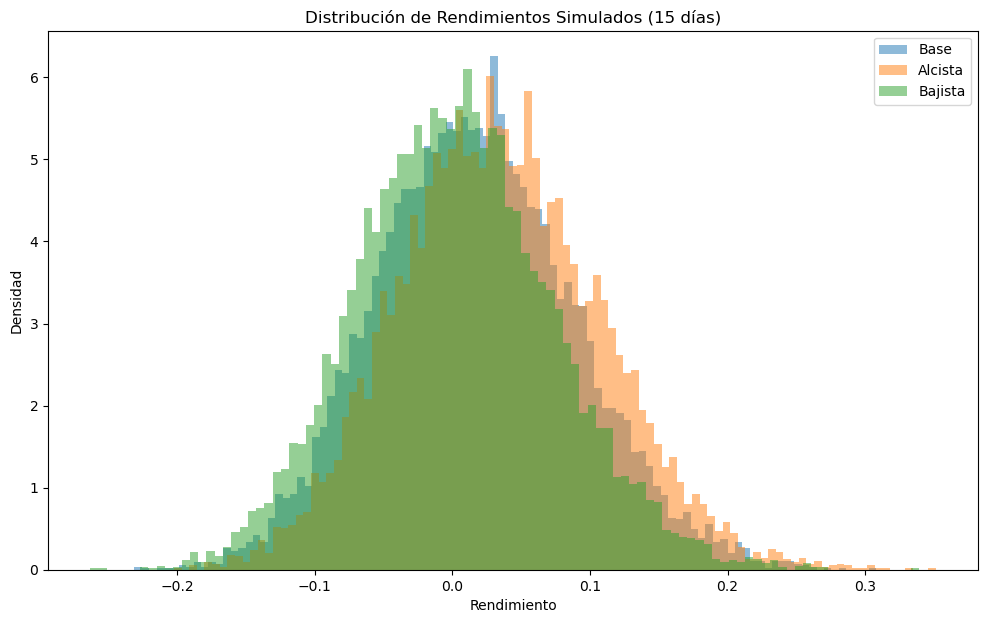

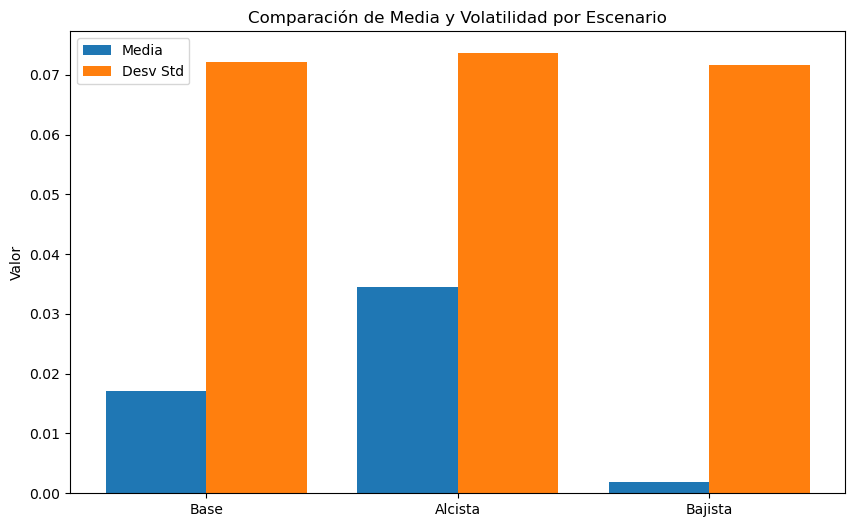

In [30]:
plt.figure(figsize=(12,7))

for scenario in scenarios.keys():

    plt.hist(
        results[scenario],
        bins=100,
        alpha=0.5,
        label=scenario,
        density=True
    )

plt.title("Distribución de Rendimientos Simulados (15 días)")
plt.xlabel("Rendimiento")
plt.ylabel("Densidad")
plt.legend()
plt.show()


x = np.arange(len(metrics_df))

plt.figure(figsize=(10,6))

plt.bar(x - 0.2, metrics_df["Media"], width=0.4, label="Media")
plt.bar(x + 0.2, metrics_df["Desv Std"], width=0.4, label="Desv Std")

plt.xticks(x, metrics_df["Escenario"])

plt.title("Comparación de Media y Volatilidad por Escenario")
plt.ylabel("Valor")
plt.legend()

plt.show()

## **Preguntas:**



- **¿En qué escenario la probabilidad de pérdida es mayor?**
En el escenario bajista (49.61%), porque al disminuir la media los rendimientos se desplazan hacia valores más negativos.


- **¿Cuál presenta mayor dispersión de resultados?**
El escenario alcista (0.0736), aunque la diferencia es mínima respecto a los otros escenarios.

- **¿Cambian de manera relevante las métricas de riesgo extremo?**
Sí. El VaR empeora en el escenario bajista (–11.32%) y mejora en el alcista (–8.11%), por lo que el riesgo extremo sí cambia de forma importante.
 